![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
8624,id_8624,Bratislava,['Healthy'],514.0,$,3.0,"[['Quick lunch', 'Hats off to the owner!'], ['...",/Restaurant_Review-g274924-d11953370-Reviews-S...,d11953370,0,0.0
39427,id_1975,Vienna,NaN,1977.0,NaN,3.0,"[['Worth a visit!'], ['09/07/2017']]",/Restaurant_Review-g190454-d12234138-Reviews-B...,d12234138,1,4.5
1889,id_1889,Milan,"['Seafood', 'Mediterranean', 'European', 'Span...",684.0,$$ - $$$,462.0,[['Excellent Halal Spanish Food. Highly Recom....,/Restaurant_Review-g187849-d2369684-Reviews-Ba...,d2369684,0,0.0
18483,id_12266,London,NaN,12276.0,NaN,10.0,"[['A real life and pocket saver', 'Crowded but...",/Restaurant_Review-g186338-d680336-Reviews-Caf...,d680336,1,4.0
46496,id_3220,Barcelona,"['Fast Food', 'International', 'European', 'Sp...",3221.0,$,7.0,"[['Fantastic sandwiches!', 'Authentic sandwich...",/Restaurant_Review-g187497-d12599437-Reviews-S...,d12599437,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

In [16]:
# заполнение пустых значений признака Reviews
data['Reviews'].fillna('[]', inplace=True)

In [17]:
# Заполнение Cuisine Style самым частым значением
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Vegetarian Friendly']")

In [18]:
# Заполнение признака Number of Reviews средним значением
data['Number of Reviews'].fillna(np.mean(data['Number of Reviews']), inplace =True)

In [19]:
# Заполнение Price Range  самым частым значением
data['Price Range'].fillna('$$ - $$$', inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        50000 non-null object
Ranking              50000 non-null float64
Price Range          50000 non-null object
Number of Reviews    50000 non-null float64
Reviews              50000 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [21]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10731
Ranking              12975
Price Range              3
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

Dummy-переменные с названиями городов будут созданы после создания новых признаков, особенно после создания признака Norm_ranking (тк в нём используется столбуц City)

In [22]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
16776,id_3085,Amsterdam,"['Argentinean', 'South American']",3095.0,$$ - $$$,5.0,[['Typical Argentinian Grill but lacking a li....,/Restaurant_Review-g188590-d12519431-Reviews-L...,d12519431,1,3.0
31347,id_1956,Munich,"['Indian', 'Balti', 'Eastern European']",1972.0,$$ - $$$,26.0,"[['Great clean Indian restaurant', 'Worst serv...",/Restaurant_Review-g187309-d9695956-Reviews-Bo...,d9695956,1,3.5
41423,id_124,Edinburgh,"['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...",125.0,$$ - $$$,541.0,"[['Delicious food', 'Naughty little Indian'], ...",/Restaurant_Review-g186525-d1010576-Reviews-Na...,d1010576,1,4.5
3510,id_3510,Lyon,['Vegetarian Friendly'],2616.0,$$ - $$$,7.0,"[[], []]",/Restaurant_Review-g661468-d8297197-Reviews-Mc...,d8297197,0,0.0
29358,id_7303,Madrid,['Pizza'],7308.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g187514-d5487276-Reviews-Te...,d5487276,1,3.0


#### Возьмем следующий признак "Price Range".

In [23]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [24]:
# тут ваш код на обработку других признаков
# .....

In [25]:
# Обработка 'Price Range' Б.1)- перевод в цифры
data['Price Range Dig'] = data['Price Range'].apply(lambda x: 1 if x=='$' else 2 if x=='$$ - $$$'  else 3 if x=='$$$$' else 0)

In [26]:
# Б.2) Создание признака настроений moods:
    good_words = ['good', 'best', 'wonderful', 'nice', 'awesome', 'lovely', 'brilliant', 'amazing', 'excellent', 'great', 'delicious', 'tasty']
    bad_words = ['wasting', 'terrible', 'horrible', 'worst', 'expensive', 'tasty', 'awful', 'poor', 'shame', 'overpriced', 'slow', 'rude']
    moods = list()
    
    # Функция mood, считающая, каких слов больше, негативных или положительных
    def mood(good, bad):
            if good-bad >0:
                return 1
            elif good-bad <0:
                return -1
            else:
                return 0
            
    # цикл для заполнения списка moods 1, -1 либо 0, в случае, если не определено настроение
    for i in data.Reviews:
        cnt_good = 0
        cnt_bad = 0
        # print(i, type(i))
        stroka = i.lower()
        str_words = stroka.split('],')[0]

        # str_words = [word.strip('.,!;()[]') for word in str_words]
        str_words = str_words.strip('.,!;()[]')
        str_words = str_words.split()
        str_words = [word.replace("'",'') for word in str_words]
        # print(str_words)
        for w in str_words:
            if w in good_words:
                cnt_good+=1
            elif w in bad_words:
                cnt_bad+=1
        moods.append(mood(cnt_good, cnt_bad))
    
    moods_df = pd.DataFrame({"Mood":moods})   
    data['moods'] = moods_df

In [27]:
data.moods.head()

0    0
1    1
2    0
3    1
4    1
Name: moods, dtype: int64

In [28]:
# Б3 Признак Cuisine_count - количество кухонь ресторана
data['Cuisine_count'] = data['Cuisine Style'].str.split(',').apply(lambda x: 1 if str(x) == 'nan' else len(x))

In [29]:
data[['Cuisine_count', 'Cuisine Style']].head()

,Cuisine_count,Cuisine Style
0,2,"['Bar', 'Pub']"
1,5,"['European', 'Scandinavian', 'Gluten Free Opti..."
2,1,['Vegetarian Friendly']
3,5,"['Italian', 'Mediterranean', 'European', 'Vege..."
4,6,"['Italian', 'Mediterranean', 'European', 'Seaf..."


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

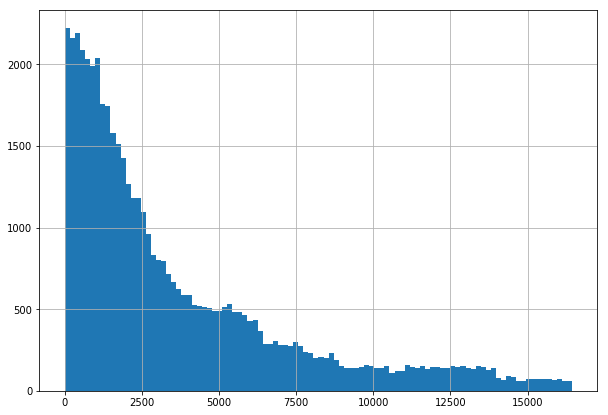

In [30]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

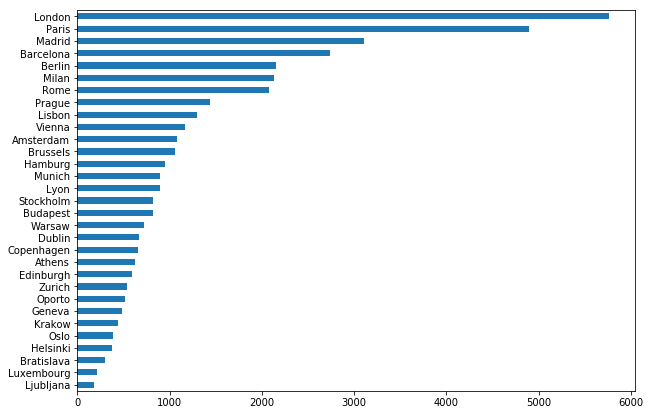

In [31]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

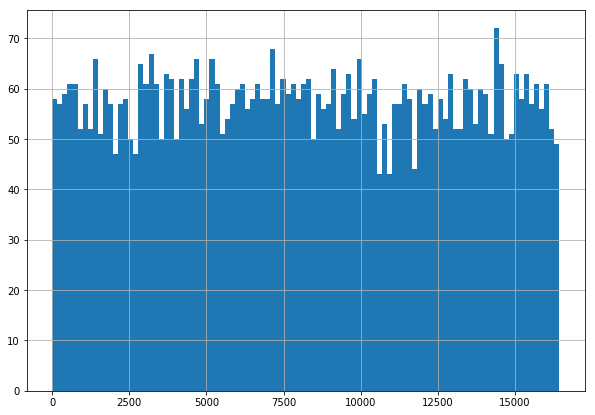

In [32]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

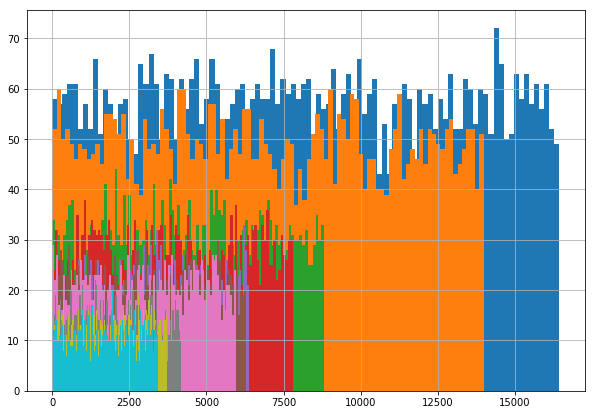

In [33]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


In [34]:
df_train['City'].value_counts()[0:10]

London       5757
Paris        4897
Madrid       3108
Barcelona    2734
Berlin       2155
Milan        2133
Rome         2078
Prague       1443
Lisbon       1300
Vienna       1166
Name: City, dtype: int64

Необходимо нормализовать признак Ranking - привести к одной шкале для всех городов, таким образом, чтобы отразить пропорции

In [35]:
# Создание массива с единым масштабированием для всех признаков и присвоение колонке Norm_ranking - нормализация
norm_rankings = []
for i in data.index:
    stroka = data.loc[i]
    max_r = data.Ranking[data.City == stroka.City].max()
    min_r = data.Ranking[data.City == stroka.City].min()
#     print(stroka.Ranking, stroka.City, (df_small.Ranking[df_small.City == stroka.City].max() -
#      df_small.Ranking[df_small.City == stroka.City].min()))
    norm_rankings.append((stroka.Ranking - min_r)/(max_r - min_r))
data['Norm_ranking'] = norm_rankings

# Цикл работает медленно (вероятно, медленнее чем функция из модуля библиотеки sklearn.preprocessing),
# но пока что не понял, как можно использовать готовую функцию для нормализации в данной задаче

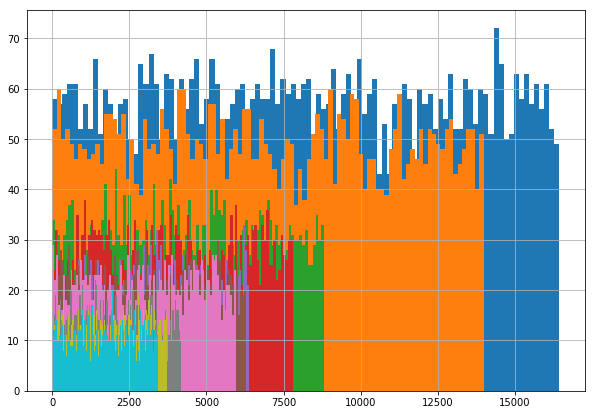

In [36]:
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

In [37]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Price Range Dig,moods,Cuisine_count,Norm_ranking
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,2,0,2,0.926840
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,2,1,5,0.089710
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2,0,1,0.458357
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,3,1,5,0.101441
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,3,1,6,0.038375


### Посмотрим распределение целевой переменной

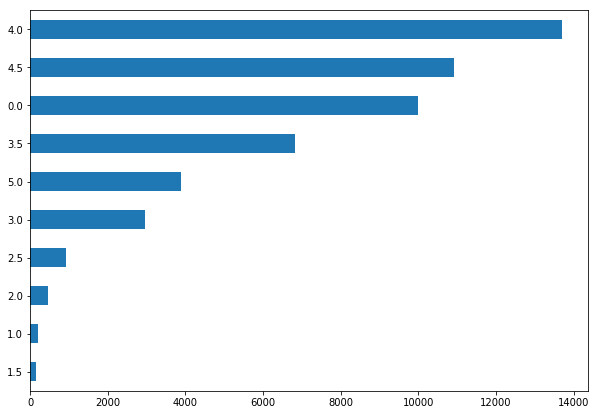

In [38]:
data['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

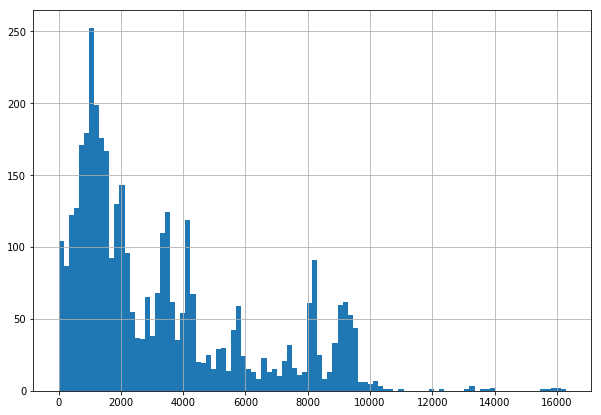

In [39]:
data['Ranking'][data['Rating'] == 5].hist(bins=100)

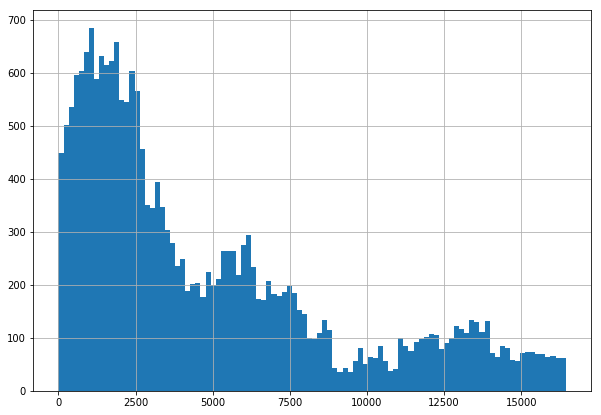

In [40]:
data['Ranking'][data['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

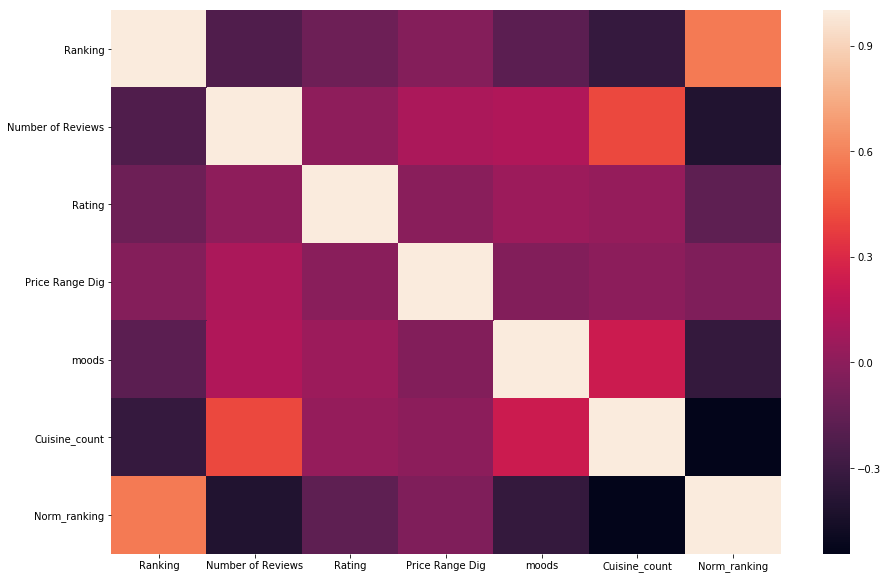

In [41]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

Видно, что Количество отзывов и ценовой диапазон коррелируют

In [42]:
# Делаем Dummy-переменные
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

В функцию почти ничего заворачивать не стал,поскольку работает слишком медленно и тяжело искать ошибки. 
Если будет больше времени, доделаю.
В функции всё, что было выше, закомментировано.

In [43]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
#     # тут ваш код по обработке NAN
#     # ....
#     df_output['Reviews'].fillna('[]', inplace=True)
    
#     # Заполнение Cuisine Style самым частым значением
#     df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna("['Vegetarian Friendly']")
    
#     # Заполнение признака Number of Reviews средним значением
#     df_output['Number of Reviews'].fillna(np.mean(df_output['Number of Reviews']), inplace =True)
    
#     # Заполнение Price Range  самым частым значением
#     df_output['Price Range'].fillna('$$ - $$$', inplace=True)
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    # Создание массива с единым масштабированием для всех признаков и присвоение колонке Norm_ranking
#     norm_rankings = []
#     for i in df_output.index:
#         stroka = df_output.loc[i]
#         max_r = df_output.Ranking[df_output.City == stroka.City].max()
#         min_r = df_output.Ranking[df_output.City == stroka.City].min()
#     #     print(stroka.Ranking, stroka.City, (df_small.Ranking[df_small.City == stroka.City].max() -
#     #      df_small.Ranking[df_small.City == stroka.City].min()))
#         norm_rankings.append((stroka.Ranking - min_r)/(max_r - min_r))
#     df_output['Norm_ranking'] = norm_rankings
    
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    # Б.1) Создание признака настроений moods с :
    
    # Списки негативных и положительных слов
#     good_words = ['good', 'best', 'wonderful', 'nice', 'awesome', 'lovely', 'brilliant', 'amazing', 'excellent', 'great', 'delicious', 'tasty']
#     bad_words = ['wasting', 'terrible', 'horrible', 'worst', 'expensive', 'tasty', 'awful', 'poor', 'shame', 'overpriced', 'slow', 'rude']
#     moods = list()
    
#     # Функция mood, считающая, каких слов больше, негативных или положительных
#     def mood(good, bad):
#             if good-bad >0:
#                 return 1
#             elif good-bad <0:
#                 return -1
#             else:
#                 return 0
#     # цикл для заполнения списка moods 1, -1 либо 0, в случае, если не определено настроение
#     for i in df_output.Reviews:
#         cnt_good = 0
#         cnt_bad = 0
#         print(i, type(i))
#         stroka = i.lower()
#         str_words = stroka.split('],')[0]

#         #str_words = [word.strip('.,!;()[]') for word in str_words]
#         str_words = str_words.strip('.,!;()[]')
#         str_words = str_words.split()
#         str_words = [word.replace("'",'') for word in str_words]
        #print(str_words)
#         for w in str_words:
#             if w in good_words:
#                 cnt_good+=1
#             elif w in bad_words:
#                 cnt_bad+=1
#         moods.append(mood(cnt_good, cnt_bad))
#         moods_df = pd.DataFrame({"Mood":moods})
#         df_output['moods'] = moods_df
        
    # Б.2) Перевод $ в цифры в признаке Price Range Dig
    # А.2) Проблему отсутсвия данных решаем частично: ставим 0 в числовом столбце
    #df_output['Price Range Dig'] = df_output['Price Range'].apply(lambda x: 1 if x=='$' else 2 if x=='$$ - $$$' else 3 if x=='$$$$' else 0)
    
    # Б.3) Признак Cuisine_count - количество кухонь ресторана
    #df_output['Cuisine_count'] = df_output['Cuisine Style'].str.split(',').apply(lambda x: 1 if str(x) == 'nan' else len(x))
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [44]:
df_preproc = preproc_data(data)
df_preproc.head(10)

,Ranking,Number of Reviews,sample,Rating,Price Range Dig,moods,Cuisine_count,Norm_ranking,City_Amsterdam,City_Athens,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,12963.0,4.0,0,0.0,2,0,2,0.926840,0,0,...,0,0,1,0,0,0,0,0,0,0
1,106.0,97.0,0,0.0,2,1,5,0.089710,0,0,...,0,0,0,0,0,0,0,0,0,0
2,810.0,28.0,0,0.0,2,0,1,0.458357,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1669.0,202.0,0,0.0,3,1,5,0.101441,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,162.0,0,0.0,3,1,6,0.038375,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5093.0,24.0,0,0.0,1,1,3,0.364013,0,0,...,0,0,1,0,0,0,0,0,0,0
6,3704.0,2.0,0,0.0,1,0,2,0.996502,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2330.0,0.0,0,0.0,2,0,1,0.954900,0,0,...,0,0,0,0,0,0,0,0,0,0
8,771.0,2.0,0,0.0,2,0,2,0.674582,0,0,...,0,0,0,0,0,0,0,0,0,0
9,605.0,13.0,0,0.0,2,1,1,0.245229,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
Ranking              50000 non-null float64
Number of Reviews    50000 non-null float64
sample               50000 non-null int64
Rating               50000 non-null float64
Price Range Dig      50000 non-null int64
moods                50000 non-null int64
Cuisine_count        50000 non-null int64
Norm_ranking         50000 non-null float64
City_Amsterdam       50000 non-null uint8
City_Athens          50000 non-null uint8
City_Barcelona       50000 non-null uint8
City_Berlin          50000 non-null uint8
City_Bratislava      50000 non-null uint8
City_Brussels        50000 non-null uint8
City_Budapest        50000 non-null uint8
City_Copenhagen      50000 non-null uint8
City_Dublin          50000 non-null uint8
City_Edinburgh       50000 non-null uint8
City_Geneva          50000 non-null uint8
City_Hamburg         50000 non-null uint8
City_Helsinki        50000 non-null uint8
C

In [46]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating', 'Ranking'], axis=1)

In [47]:
train_data.head()

,Ranking,Number of Reviews,Rating,Price Range Dig,moods,Cuisine_count,Norm_ranking,City_Amsterdam,City_Athens,City_Barcelona,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
10000,5570.0,194.0,3.5,2,1,3,0.398126,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10001,1537.0,10.0,4.0,2,1,1,0.623630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10002,353.0,688.0,4.5,3,0,7,0.021407,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10003,3458.0,3.0,5.0,2,0,1,0.542543,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10004,621.0,84.0,4.0,2,1,3,0.223913,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
test_data.head()

,Ranking,Number of Reviews,Rating,Price Range Dig,moods,Cuisine_count,Norm_ranking,City_Amsterdam,City_Athens,City_Barcelona,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,12963.0,4.0,0.0,2,0,2,0.926840,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,106.0,97.0,0.0,2,1,5,0.089710,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,810.0,28.0,0.0,2,0,1,0.458357,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1669.0,202.0,0.0,3,1,5,0.101441,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,162.0,0.0,3,1,6,0.038375,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y

array([3.5, 4. , 4.5, ..., 4.5, 4. , 3. ])

In [50]:
X

,Number of Reviews,Price Range Dig,moods,Cuisine_count,Norm_ranking,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
10000,194.0,2,1,3,0.398126,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10001,10.0,2,1,1,0.623630,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10002,688.0,3,0,7,0.021407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10003,3.0,2,0,1,0.542543,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10004,84.0,2,1,3,0.223913,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,79.0,2,1,4,0.079535,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,542.0,2,0,5,0.453265,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
49997,4.0,2,1,2,0.670321,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49998,70.0,2,0,5,0.297260,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [51]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [52]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 39), (40000, 39), (40000, 37), (32000, 37), (8000, 37))

# Model 
Сам ML

In [53]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [54]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [55]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [56]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20772437500000002


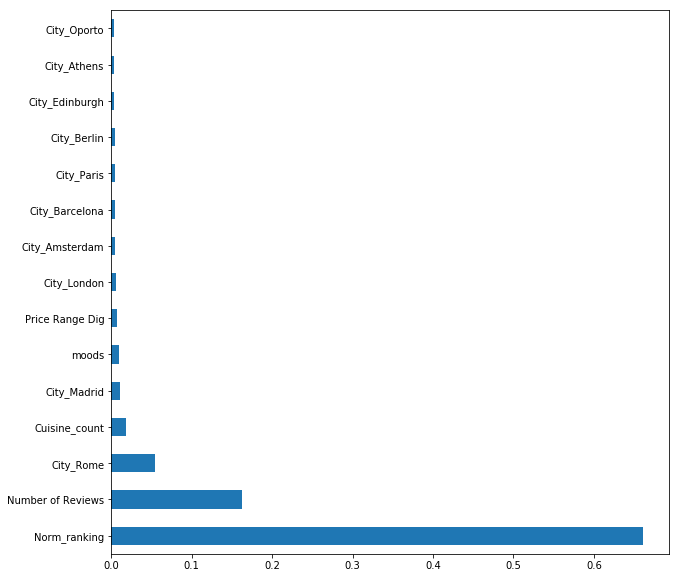

In [57]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [58]:
test_data = test_data.drop(['Rating','Ranking'], axis=1)

In [59]:
test_data

,Number of Reviews,Price Range Dig,moods,Cuisine_count,Norm_ranking,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,4.0,2,0,2,0.926840,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,97.0,2,1,5,0.089710,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,2,0,1,0.458357,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,202.0,3,1,5,0.101441,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,162.0,3,1,6,0.038375,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,28.0,1,1,4,0.265523,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,2.0,2,0,4,0.702637,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,2.0,2,0,1,0.886356,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,2.0,2,0,1,0.638986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [61]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [62]:
predict_submission

array([3.045, 4.305, 4.48 , ..., 3.11 , 4.485, 4.21 ])

In [63]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.045
1,id_1,4.305
2,id_2,4.480
3,id_3,4.225
4,id_4,4.500
5,id_5,4.595
6,id_6,1.250
7,id_7,3.495
8,id_8,4.230
9,id_9,4.715


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
